/home/lichard/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/lichard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


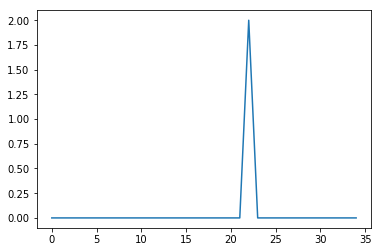

In [245]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale

pd.set_option("display.max_rows", None)
wData = pd.read_csv('wineData.txt', names=['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])

from sklearn.utils import shuffle
wData = shuffle(wData)

wClass = wData.drop(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'], 1)
wData = wData.drop('Class', 1)

# нормализация данных
wData['Alcohol'] = scale(wData['Alcohol'])
wData['Malic acid'] = scale(wData['Malic acid'])
wData['Ash'] = scale(wData['Ash'])
wData['Alcalinity of ash'] = scale(wData['Alcalinity of ash'])
wData['Magnesium'] = scale(wData['Magnesium'])
wData['Total phenols'] = scale(wData['Total phenols'])
wData['Flavanoids'] = scale(wData['Flavanoids'])
wData['Nonflavanoid phenols'] = scale(wData['Nonflavanoid phenols'])
wData['Proanthocyanins'] = scale(wData['Proanthocyanins'])
wData['Color intensity'] = scale(wData['Color intensity'])
wData['Hue'] = scale(wData['Hue'])
wData['OD280/OD315 of diluted wines'] = scale(wData['OD280/OD315 of diluted wines'])
wData['Proline'] = scale(wData['Proline'])

# подбираем параметр k
j = []
for k in range(1, 51):
    j.append(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k), wData, wClass['Class'], cv=kf)))

# обучаем классификатор
neigh = KNeighborsClassifier(n_neighbors=j.index(max(j)) + 1)
count = len(wData.index)//5
neigh.fit(wData.iloc[0:len(wData.index) - count], wClass.iloc[0:len(wData.index) - count])

# H0 - 1й сорт винограда,
# H1 - не 1й сорт,
# O1 - ошибка 1 рода (1й сорт был классифицирован как 2й или 3й),
# O2 - ошибка 2 рода (2й или 3й сорт классифицирован как 1й)
g = []
for i in range(len(wData.index) - count, len(wData.index)):
    pred = neigh.predict(wData.iloc[[i]])[0]
    real = wClass.iloc[i][0]
    if real == 1 and pred != 1:
        g.append(1)
    elif real != 1 and pred == 1:
        g.append(2)
    else:
        g.append(0)

import matplotlib.pyplot as plt
plt.plot(g)
plt.show()
